In [17]:
import pandas as pd 
import numpy as np 

In [18]:
df1 = pd.read_csv("bhp.csv")
df1.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [4]:
df1.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [5]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'count')

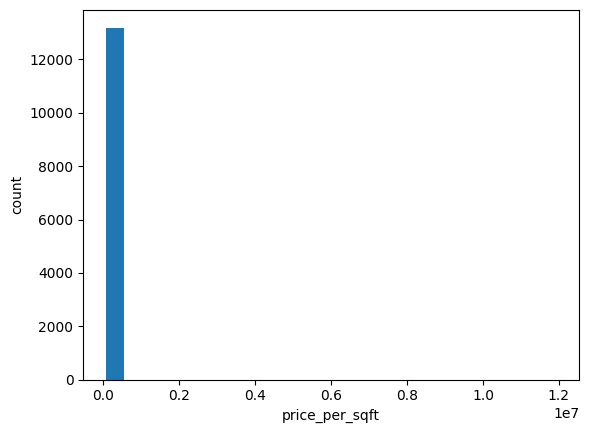

In [6]:
plt.hist(df1.price_per_sqft ,bins = 20 , rwidth= 0.8)
plt.xlabel('price_per_sqft')
plt.ylabel('count')

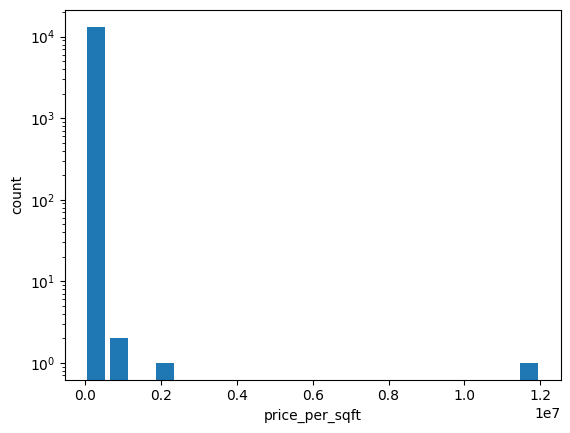

In [7]:
plt.hist(df1.price_per_sqft ,bins = 20 , rwidth= 0.8)
plt.xlabel('price_per_sqft')
plt.ylabel('count')
plt.yscale('log')

In [8]:
lower_limit , upper_limit = df1.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [9]:
df2 = df1[(df1.price_per_sqft < upper_limit ) & (df1.price_per_sqft > lower_limit)]
df2.shape

(13172, 7)

using 4 standard deviation

In [10]:
max_limit = df2.price_per_sqft.mean() + 4 * df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4 * df2.price_per_sqft.std()
min_limit, max_limit

(-9900.429065502582, 23227.73653589432)

In [11]:
df3 = df2[(df2.price_per_sqft >  min_limit ) & (df2.price_per_sqft <  max_limit)]
df3.shape

(13047, 7)

Text(0, 0.5, 'count')

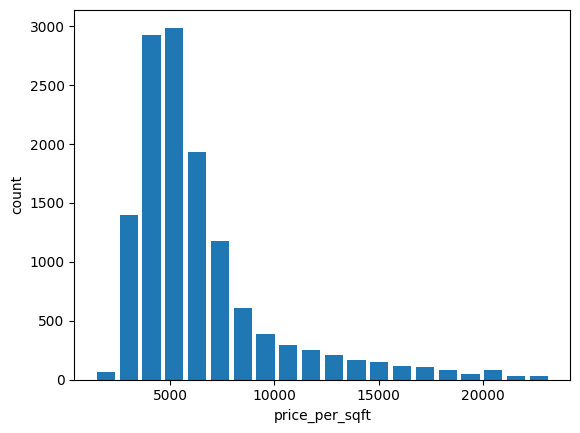

In [12]:
plt.hist(df3.price_per_sqft ,bins = 20 , rwidth= 0.8)
plt.xlabel('price_per_sqft')
plt.ylabel('count')

In [13]:
from scipy.stats import norm

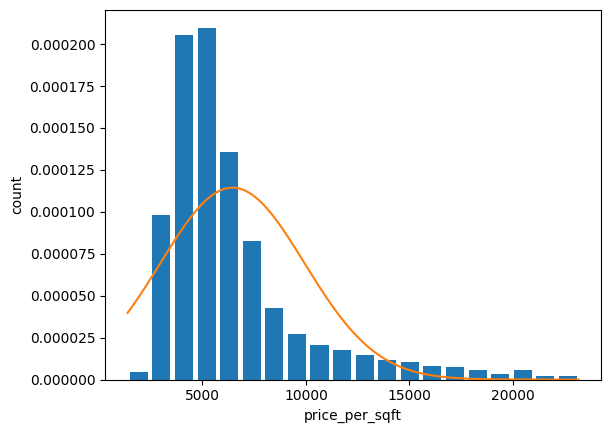

In [14]:
plt.hist(df3.price_per_sqft, bins = 20 , rwidth=0.8, density=True)
plt.xlabel('price_per_sqft')
plt.ylabel('count')
rng = np.arange(df3.price_per_sqft.min(), df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng, df3.price_per_sqft.mean() , df3.price_per_sqft.std()))

using z-score

In [15]:
df2['z_score'] = (df2.price_per_sqft - df2.price_per_sqft.mean())/ df2.price_per_sqft.std()
df2.sample(10)

C:\Users\HP\AppData\Local\Temp\ipykernel_13896\3196899226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['z_score'] = (df2.price_per_sqft - df2.price_per_sqft.mean())/ df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
12140,other,5 Bedroom,1600.0,5.0,140.0,5,8750,0.503824
4844,Sarjapur Road,4 Bedroom,1750.0,3.0,215.0,4,12285,1.357478
11295,Bhoganhalli,2 BHK,970.0,2.0,52.5,2,5412,-0.302257
400,7th Phase JP Nagar,2 BHK,1175.0,2.0,82.0,2,6978,0.075910
1660,Kanakpura Road,2 BHK,1495.0,2.0,90.0,2,6020,-0.155434
5706,Banashankari,2 BHK,1290.0,2.0,80.0,2,6201,-0.111725
567,Sarjapur Road,4 Bedroom,2230.0,4.0,225.0,4,10089,0.827174
9130,Whitefield,3 BHK,1600.0,3.0,95.0,3,5937,-0.175477
13104,other,2 BHK,1155.0,2.0,64.0,2,5541,-0.271106
11412,Bannerghatta,3 BHK,1776.0,3.0,150.0,3,8445,0.430171


In [16]:
df4 = df2[(df2.z_score > -4) & (df2.z_score < 4)]
df4.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
3564,Binny Pete,1 BHK,660.0,1.0,62.0,1,9393,0.659100
3034,Panathur,3 BHK,1370.0,2.0,61.5,3,4489,-0.525149
9892,Whitefield,3 BHK,2247.0,3.0,145.0,3,6453,-0.050870
12158,other,8 Bedroom,1150.0,8.0,70.0,8,6086,-0.139495
7436,Binny Pete,3 BHK,1970.0,3.0,164.0,3,8324,0.400951
835,Bisuvanahalli,3 BHK,1075.0,3.0,36.0,3,3348,-0.800685
9182,other,2 BHK,1160.0,2.0,75.0,2,6465,-0.047972
2355,Vidyaranyapura,2 BHK,1060.0,2.0,55.0,2,5188,-0.356350
3723,Sarjapur,3 Bedroom,2238.0,3.0,140.0,3,6255,-0.098684
13050,Pai Layout,3 BHK,1600.0,2.0,65.0,3,4062,-0.628264
